/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


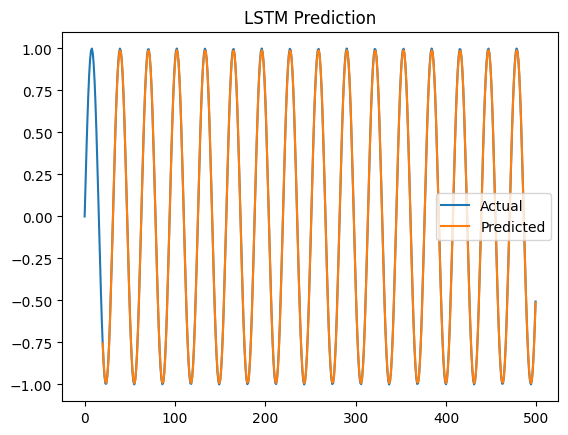

In [1]:
# 🤖 Simple LSTM (RNN) Example – Predicting a Sine Wave

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1️ Create sample sine wave data
x = np.linspace(0, 100, 500)
y = np.sin(x)

# 2️ Prepare data (each 20 steps predict next step)
X, Y = [], []
for i in range(len(y) - 20):
    X.append(y[i:i+20])
    Y.append(y[i+20])
X, Y = np.array(X), np.array(Y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# 3️ Build RNN model using LSTM
model = Sequential([
    LSTM(50, input_shape=(20,1)),
    Dense(1)
])

# 4️ Compile & Train
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=10, batch_size=32, verbose=0)

# 5️ Predict & Plot
pred = model.predict(X)
plt.plot(y, label='Actual')
plt.plot(np.arange(20, len(pred)+20), pred, label='Predicted')
plt.legend(); plt.title("LSTM Prediction"); plt.show()
